In [28]:
import random
import numpy as np
import math
from scipy import stats
import pandas as pd

N = 200
mean_control = 400
delta_tratamento = 10

std = 100
n_pontos = 40
n_simul = 10

### Variando o STD

<AxesSubplot:>

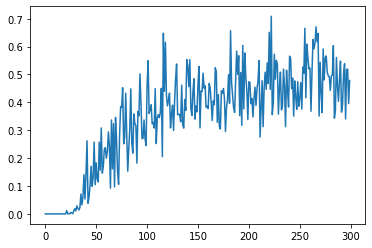

In [54]:

vec_std = [None]*3000

for delta_std_simul in range(0,300):
    mean_tratamento = mean_control + delta_tratamento
    
    pval_acum = 0
    for ii in range(0,n_simul):
        controle = (np.random.randn(N)*delta_std_simul) + mean_control
        tratamento = (np.random.randn(N)*delta_std_simul) + mean_tratamento

        ## Cross Checking with the internal scipy function
        t2, pval = stats.ttest_ind(controle,tratamento)
        pval_acum += pval
    pval_final = pval_acum / n_simul  
    
    #print("t = " + str(t2))
    #print("p = " + str(pval))
    #adsasd
    vec_std[delta_std_simul] = pval_final

pd.Series(vec_std).plot()

### Variando o efeito médio

<AxesSubplot:>

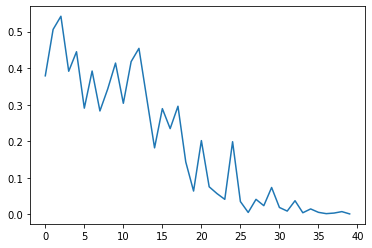

In [49]:

vec_pvalue = [None]*n_pontos

for delta_tratamento_simul in range(0,n_pontos):
    mean_tratamento = mean_control + delta_tratamento_simul
    
    pval_acum = 0
    for ii in range(0,n_simul):
        controle = (np.random.randn(N)*std) + mean_control
        tratamento = (np.random.randn(N)*std) + mean_tratamento

        ## Cross Checking with the internal scipy function
        t2, pval = stats.ttest_ind(controle,tratamento)
        pval_acum += pval
    pval_final = pval_acum / n_simul  
    
    #print("t = " + str(t2))
    #print("p = " + str(pval))
    #adsasd
    vec_pvalue[delta_tratamento_simul] = pval_final

pd.Series(vec_pvalue).plot()

### Variando o tamanho da amostra

<AxesSubplot:>

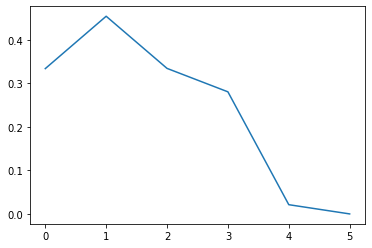

In [50]:
size_simul = [10, 50, 200, 500, 2000, 10000]
vec_pvalue = [None]*len(size_simul)
ii_out=-1
for N_simul in size_simul:
    ii_out+=1
    mean_tratamento = mean_control + delta_tratamento
    
    pval_acum = 0
    for ii in range(0,n_simul):
        controle = (np.random.randn(N_simul)*std) + mean_control
        tratamento = (np.random.randn(N_simul)*std) + mean_tratamento

        ## Cross Checking with the internal scipy function
        t2, pval = stats.ttest_ind(controle,tratamento)
        pval_acum += pval
    pval_final = pval_acum / n_simul  
    
    #print("t = " + str(t2))
    #print("p = " + str(pval))
    vec_pvalue[ii_out] = pval_final

pd.Series(vec_pvalue).plot()